In [81]:
import pandas as pd

In [83]:
df = pd.read_excel('Cleaned_Perovskite_Data.xlsx')    
print("Step 1: Loaded the input file.")

Step 1: Loaded the input file.


In [85]:
df.head()

,Cell_area_total,Cell_number_of_cells_per_substrate,Cell_semitransparent_AVT,Module_number_of_cells_in_module,Module_area_total,Module_area_effective,Substrate_area,Perovskite_deposition_number_of_deposition_steps,Perovskite_storage_relative_humidity,HTL_storage_relative_humidity,...,Outdoor_periodic_JV_measurements_time_between_measurements,Outdoor_PCE_initial_value,Outdoor_PCE_end_of_experiment,Outdoor_PCE_T95,Outdoor_PCE_Ts95,Outdoor_PCE_T80,Outdoor_PCE_Ts80,Outdoor_PCE_Tse80,Outdoor_power_generated,Perovskite_composition_long_form
0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CsSnI3
1,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CsSnBr0.3I2.7
2,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CsSnBr1.5I1.5
3,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CsSnBr2.7I0.3
4,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CsSnBr3


In [87]:
df.shape

(43398, 82)

In [89]:
columns = df.columns
columns

Index(['Cell_area_total', 'Cell_number_of_cells_per_substrate',
       'Cell_semitransparent_AVT', 'Module_number_of_cells_in_module',
       'Module_area_total', 'Module_area_effective', 'Substrate_area',
       'Perovskite_deposition_number_of_deposition_steps',
       'Perovskite_storage_relative_humidity', 'HTL_storage_relative_humidity',
       'Add_lay_front_additives_compounds',
       'Add_lay_front_additives_concentrations',
       'Add_lay_front_deposition_synthesis_atmosphere_relative_humidity',
       'Add_lay_front_surface_treatment_before_next_deposition_step',
       'Add_lay_back_additives_compounds',
       'Add_lay_back_additives_concentrations',
       'Add_lay_back_deposition_synthesis_atmosphere_relative_humidity',
       'Add_lay_back_surface_treatment_before_next_deposition_step',
       'JV_average_over_n_number_of_cells', 'JV_light_intensity',
       'JV_scan_speed', 'JV_scan_delay_time', 'JV_scan_integration_time',
       'JV_scan_voltage_step', 'JV_preconditi

In [91]:
total_rows = len(df)

nan_counts = df.isna().sum()
nan_percentage = nan_counts/total_rows*100

index = 0
for column in df.columns:
     print(f" {index}. {column}: {nan_percentage[column]:.2f}% of rows are NaN")
     index+=1
    



 0. Cell_area_total: 97.15% of rows are NaN
 1. Cell_number_of_cells_per_substrate: 0.10% of rows are NaN
 2. Cell_semitransparent_AVT: 99.98% of rows are NaN
 3. Module_number_of_cells_in_module: 0.10% of rows are NaN
 4. Module_area_total: 99.21% of rows are NaN
 5. Module_area_effective: 99.69% of rows are NaN
 6. Substrate_area: 98.29% of rows are NaN
 7. Perovskite_deposition_number_of_deposition_steps: 0.10% of rows are NaN
 8. Perovskite_storage_relative_humidity: 99.85% of rows are NaN
 9. HTL_storage_relative_humidity: 99.95% of rows are NaN
 10. Add_lay_front_additives_compounds: 100.00% of rows are NaN
 11. Add_lay_front_additives_concentrations: 100.00% of rows are NaN
 12. Add_lay_front_deposition_synthesis_atmosphere_relative_humidity: 100.00% of rows are NaN
 13. Add_lay_front_surface_treatment_before_next_deposition_step: 100.00% of rows are NaN
 14. Add_lay_back_additives_compounds: 100.00% of rows are NaN
 15. Add_lay_back_additives_concentrations: 100.00% of rows are

In [93]:
df_numeric = df.select_dtypes(include = ['number'])
corr_matrix = df_numeric.corr()
print("correlation matrix is done")

correlation matrix is done


In [95]:
corr_matrix['Stabilised_performance_PCE'].sort_values(ascending = False)

Stabilised_performance_PCE          1.000000
JV_forward_scan_shunt_resistance    1.000000
JV_default_PCE                      0.999277
JV_forward_scan_PCE                 0.955613
Stabilised_performance_Jmp          0.945936
                                      ...   
Outdoor_PCE_Ts95                         NaN
Outdoor_PCE_T80                          NaN
Outdoor_PCE_Ts80                         NaN
Outdoor_PCE_Tse80                        NaN
Outdoor_power_generated                  NaN
Name: Stabilised_performance_PCE, Length: 81, dtype: float64

In [97]:

def drop_null_columns(df, threshold):
    
    # Calculate the percentage of null values for each column
    null_percentage = df.isnull().mean()
    
    # Drop columns with null percentage greater than the threshold
    columns_to_drop = null_percentage[null_percentage > threshold].index
    df_dropped = df.drop(columns=columns_to_drop)
    
    #print(f"Dropped columns: {list(columns_to_drop)}")
    return df_dropped


In [129]:
# Drop columns with more than 40% null values
df_cleaned = drop_null_columns(df, threshold=0.96)
print("dropping is done")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
dropping is done


In [131]:
df_cleaned = df_cleaned.drop(['Cell_number_of_cells_per_substrate', 'Module_number_of_cells_in_module'], axis = 1)

In [133]:
total_rows = len(df)
nan_counts = df.isna().sum()
nan_percentage = nan_counts/total_rows*100
index = 0;
for column in df_cleaned.columns:
     print(f" {index}. {column}: {nan_percentage[column]:.2f}% of rows are NaN")
     index+=1
    

 0. Perovskite_deposition_number_of_deposition_steps: 0.10% of rows are NaN
 1. JV_average_over_n_number_of_cells: 0.08% of rows are NaN
 2. JV_light_intensity: 0.37% of rows are NaN
 3. JV_scan_speed: 61.47% of rows are NaN
 4. JV_reverse_scan_Voc: 6.84% of rows are NaN
 5. JV_reverse_scan_Jsc: 6.77% of rows are NaN
 6. JV_reverse_scan_FF: 7.19% of rows are NaN
 7. JV_reverse_scan_PCE: 4.19% of rows are NaN
 8. JV_forward_scan_Voc: 78.73% of rows are NaN
 9. JV_forward_scan_Jsc: 78.69% of rows are NaN
 10. JV_forward_scan_FF: 78.80% of rows are NaN
 11. JV_forward_scan_PCE: 78.29% of rows are NaN
 12. JV_default_PCE: 2.37% of rows are NaN
 13. JV_hysteresis_index: 80.63% of rows are NaN
 14. Stabilised_performance_PCE: 92.08% of rows are NaN
 15. EQE_integrated_Jsc: 87.11% of rows are NaN
 16. Stability_average_over_n_number_of_cells: 0.10% of rows are NaN
 17. Stability_time_total_exposure: 82.94% of rows are NaN
 18. Stability_PCE_initial_value: 92.99% of rows are NaN
 19. Stability

In [105]:
df_cleaned.shape

(43398, 24)

In [107]:
dfc1 = df_cleaned.copy()
dfc2 = df_cleaned.copy() 

In [109]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import math
cols = list(df_cleaned.columns)
input_cols = [col for col in cols if col not in ['JV_reverse_scan_PCE', 'JV_forward_scan_PCE', 'Stabilised_performance_PCE','Perovskite_composition_long_form']]
output_cols = ['JV_reverse_scan_PCE', 'JV_forward_scan_PCE', 'Stabilised_performance_PCE', 'Stability_PCE_T80'] 
n_cols = 5
n_rows = math.ceil(len(input_cols)/n_cols)


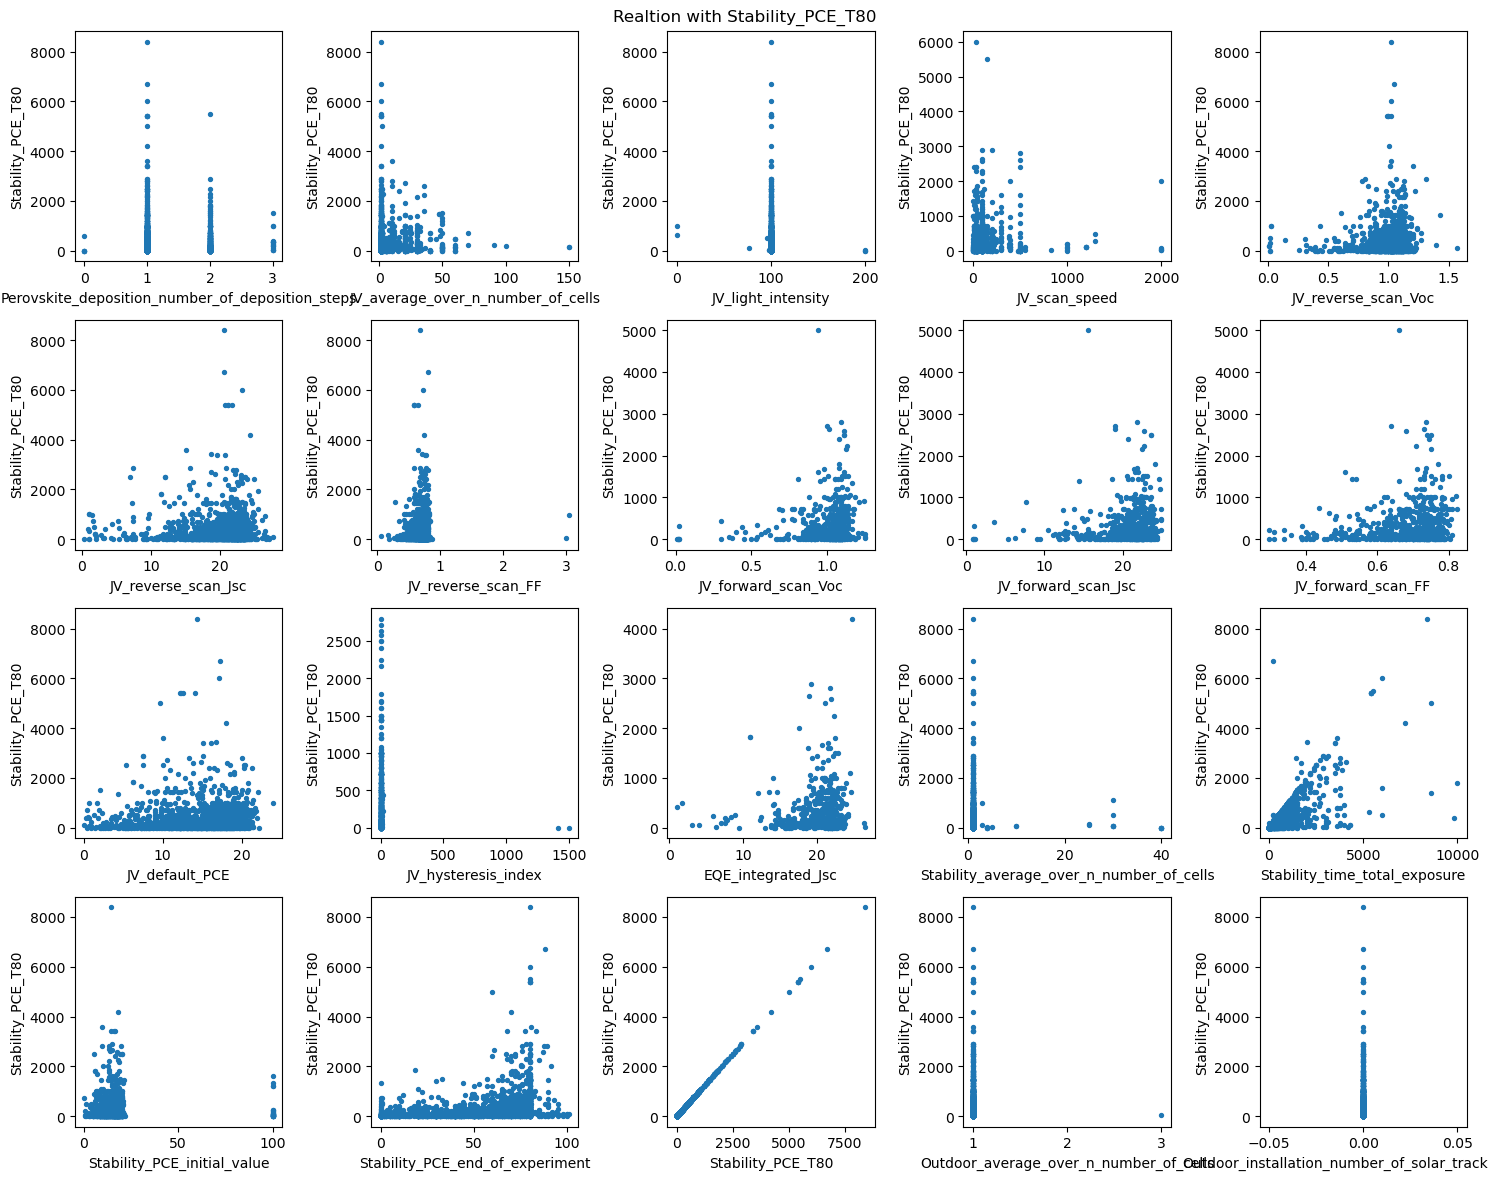

In [125]:
output_col = output_cols[3]
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()
#idx = 0
for idx, input_col in enumerate(input_cols):
    if idx<len(axes):   
        curr_axes = axes[idx]
        curr_axes.scatter(df[input_col], df[output_col],s=8)
        curr_axes.set_xlabel(input_col)
        curr_axes.set_ylabel(output_col)
    #idx+=1

fig.suptitle(f"Realtion with {output_col}")
plt.tight_layout()
plt.show()

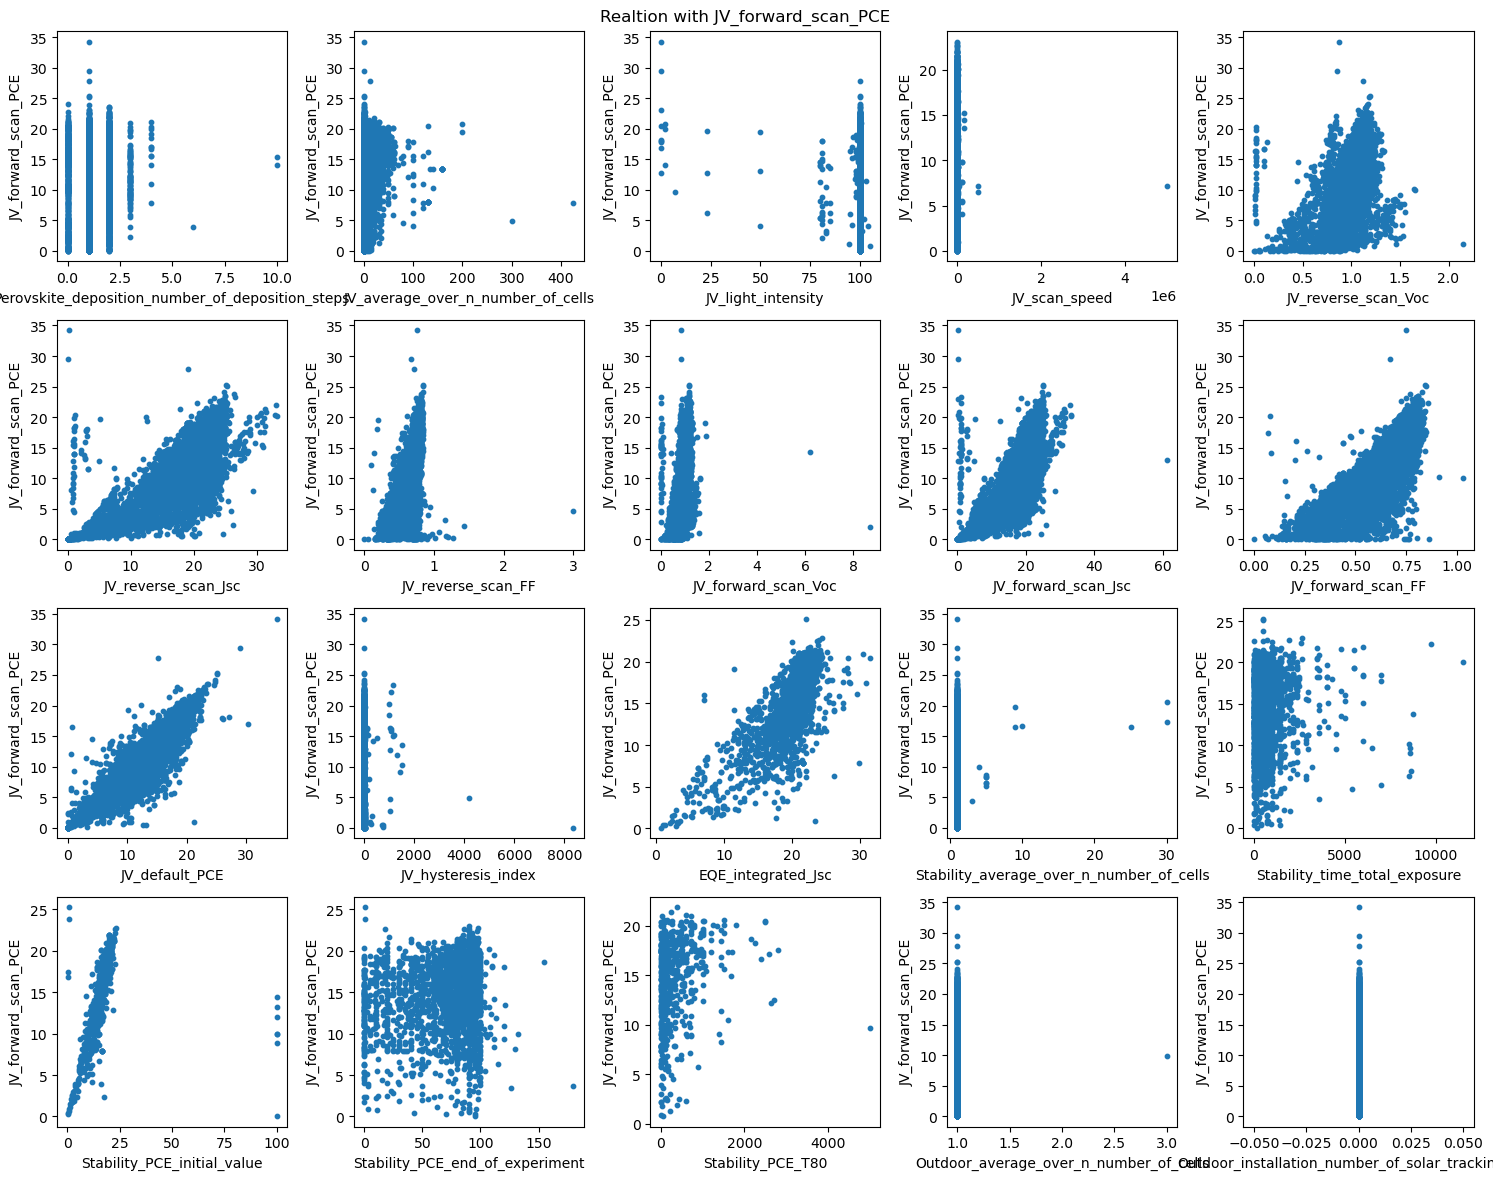

In [41]:
output_col = output_cols[1]
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()
#idx = 0
for idx, input_col in enumerate(input_cols):       
    curr_axes = axes[idx]
    curr_axes.scatter(df[input_col], df[output_col], s=10)
    curr_axes.set_xlabel(input_col)
    curr_axes.set_ylabel(output_col)
    #idx+=1
fig.suptitle(f"Realtion with {output_col}")
plt.tight_layout()
plt.show()

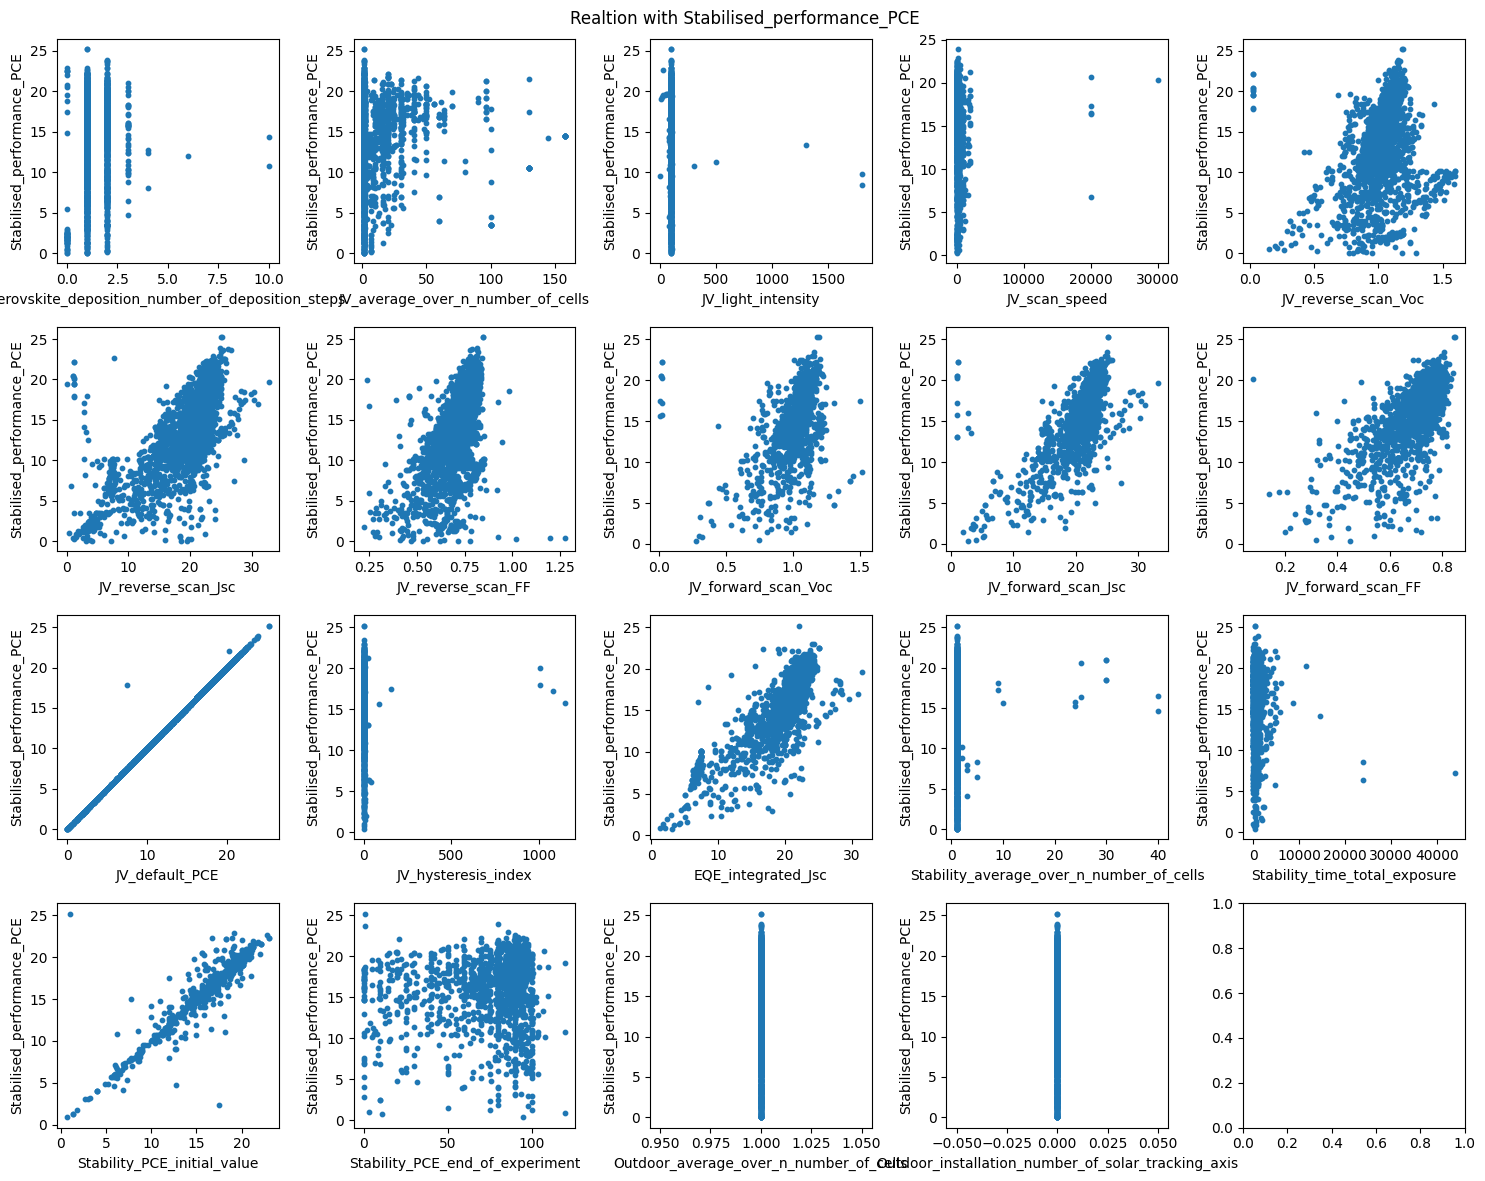

In [22]:
output_col = output_cols[2]
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()
#idx = 0
for idx, input_col in enumerate(input_cols):
#for input_col in (input_cols):
    #i = idx//n_cols
    #j = idx%n_cols        
    curr_axes = axes[idx]
    curr_axes.scatter(df[input_col], df[output_col], s=10)
    curr_axes.set_xlabel(input_col)
    curr_axes.set_ylabel(output_col)
    #idx+=1
fig.suptitle(f"Relation with {output_col}")
plt.tight_layout()
plt.show()

In [113]:
df_numeric = df_cleaned.select_dtypes(include = ['number'])
corr_matrix = df_numeric.corr()
print("correlation matrix is done")

correlation matrix is done


In [115]:
corr_matrix['JV_reverse_scan_PCE'].sort_values(ascending = False)

JV_reverse_scan_PCE                                   1.000000
JV_default_PCE                                        0.986421
Stabilised_performance_PCE                            0.943011
JV_forward_scan_PCE                                   0.934010
JV_reverse_scan_Jsc                                   0.792943
JV_forward_scan_Jsc                                   0.780894
EQE_integrated_Jsc                                    0.778689
JV_reverse_scan_FF                                    0.744813
JV_forward_scan_FF                                    0.641601
JV_reverse_scan_Voc                                   0.601405
JV_forward_scan_Voc                                   0.481247
Stability_PCE_initial_value                           0.361689
Stability_PCE_T80                                     0.076513
Stability_PCE_end_of_experiment                       0.069722
JV_average_over_n_number_of_cells                     0.050754
Stability_average_over_n_number_of_cells              0

In [47]:
corr_matrix['JV_forward_scan_PCE'].sort_values(ascending = False)

JV_forward_scan_PCE                                   1.000000
Stabilised_performance_PCE                            0.955613
JV_default_PCE                                        0.942241
JV_reverse_scan_PCE                                   0.934010
JV_forward_scan_FF                                    0.806483
JV_forward_scan_Jsc                                   0.751296
EQE_integrated_Jsc                                    0.746553
JV_reverse_scan_Jsc                                   0.743956
JV_reverse_scan_FF                                    0.686057
JV_reverse_scan_Voc                                   0.523787
JV_forward_scan_Voc                                   0.520021
Stability_PCE_initial_value                           0.377245
Stability_PCE_T80                                     0.201672
Stability_PCE_end_of_experiment                       0.152940
Stability_time_total_exposure                         0.048374
JV_average_over_n_number_of_cells                     0

In [127]:
corr_matrix['Stability_PCE_T80'].sort_values(ascending = False)

Stability_PCE_T80                                     1.000000
Stability_time_total_exposure                         0.692748
Stability_PCE_end_of_experiment                       0.320478
JV_forward_scan_PCE                                   0.201672
JV_forward_scan_FF                                    0.166843
JV_forward_scan_Voc                                   0.141633
JV_forward_scan_Jsc                                   0.141412
EQE_integrated_Jsc                                    0.107881
Stabilised_performance_PCE                            0.094621
JV_reverse_scan_PCE                                   0.076513
JV_default_PCE                                        0.070792
JV_reverse_scan_Voc                                   0.069499
JV_reverse_scan_FF                                    0.061790
JV_reverse_scan_Jsc                                   0.037140
JV_scan_speed                                         0.008163
JV_average_over_n_number_of_cells                     0

In [119]:
#df_cleaned = df_cleaned.drop(['Cell_number_of_cells_per_substrate', 'Module_number_of_cells_in_module'], axis = 1)
df_cleaned.drop(['Outdoor_average_over_n_number_of_cells', 'Outdoor_installation_number_of_solar_tracking_axis', 'JV_scan_speed', 'JV_hysteresis_index', 
                'Stability_average_over_n_number_of_cells','JV_average_over_n_number_of_cells', 'Perovskite_deposition_number_of_deposition_steps',
                'JV_light_intensity'], 
                axis = 1, inplace = True)

In [121]:
list(df_cleaned.columns)

['JV_reverse_scan_Voc',
 'JV_reverse_scan_Jsc',
 'JV_reverse_scan_FF',
 'JV_reverse_scan_PCE',
 'JV_forward_scan_Voc',
 'JV_forward_scan_Jsc',
 'JV_forward_scan_FF',
 'JV_forward_scan_PCE',
 'JV_default_PCE',
 'Stabilised_performance_PCE',
 'EQE_integrated_Jsc',
 'Stability_time_total_exposure',
 'Stability_PCE_initial_value',
 'Stability_PCE_end_of_experiment',
 'Stability_PCE_T80',
 'Perovskite_composition_long_form']

In [123]:
df_cleaned.to_excel('Relevant_features.xlsx', index = False)
print("Saved to excel sheet")

Saved to excel sheet
